In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

Load data

In [2]:
cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


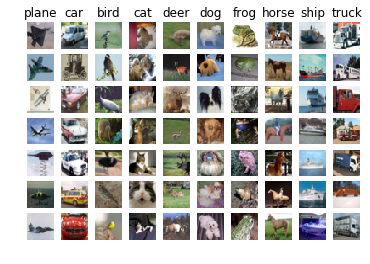

In [3]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [4]:
num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 500

mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)


替换成像素值

In [5]:
# Preprocessing: reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

# As a sanity check, print out the shapes of the data
print('Training data shape: ', X_train.shape)
print('Validation data shape: ', X_val.shape)
print('Test data shape: ', X_test.shape)
print('dev data shape: ', X_dev.shape)

Training data shape:  (49000, 3072)
Validation data shape:  (1000, 3072)
Test data shape:  (1000, 3072)
dev data shape:  (500, 3072)


[130.64189796 135.98173469 132.47391837 130.05569388 135.34804082
 131.75402041 130.96055102 136.14328571 132.47636735 131.48467347]


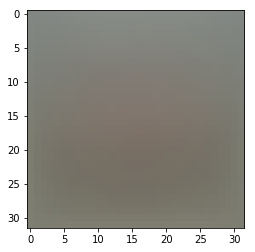

In [6]:
# Preprocessing: subtract the mean image
# first: compute the image mean based on the training data
mean_image = np.mean(X_train, axis=0)
print(mean_image[:10]) # print a few of the elements
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) # visualize the mean image
plt.show()

In [7]:
# second: subtract the mean image from train and test data
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image
X_dev -= mean_image

给x_data增加一列，用于参数b

In [8]:
# third: append the bias dimension of ones (i.e. bias trick) so that our SVM
# only has to worry about optimizing a single weight matrix W.
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])

print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)

(49000, 3073) (1000, 3073) (1000, 3073) (500, 3073)


## 使用SVM进行分类

In [9]:
from cs231n.classifiers.linear_svm import svm_loss_naive

# 生成权重矩阵
W = np.random.randn(3073, 10) * 0.0001 

loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.00001)
print('loss: %f' % (loss, ))

loss: 9.157338


In [10]:
from cs231n.classifiers.linear_svm import svm_loss_vectorized

W = np.random.randn(3073, 10) * 0.0001 

loss, grad = svm_loss_vectorized(W, X_dev, y_dev, 0.00001)
print('loss: %f' % (loss, ))

loss: 9.458916


分别比较两种方式算loss和算gradient的时间

In [11]:
import time 
tic = time.time()
loss_naive, grad_naive = svm_loss_naive(W, X_dev, y_dev, 0.00001)
toc = time.time()
print('Naive loss: %e computed in %fs' % (loss_naive, toc - tic))

from cs231n.classifiers.linear_svm import svm_loss_vectorized
tic = time.time()
loss_vectorized, _ = svm_loss_vectorized(W, X_dev, y_dev, 0.00001)
toc = time.time()
# print(type(loss_vectorized))
print('Vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))

print('difference: %f' % (loss_naive - loss_vectorized))

Naive loss: 9.458916e+00 computed in 0.069984s
Vectorized loss: 9.458916e+00 computed in 0.001697s
difference: 0.000000


In [12]:
tic = time.time()
_, grad_naive = svm_loss_naive(W, X_dev, y_dev, 0.00001)
toc = time.time()
print('Naive loss and gradient: computed in %fs' % (toc - tic))

tic = time.time()
_, grad_vectorized = svm_loss_vectorized(W, X_dev, y_dev, 0.00001)
toc = time.time()
print('Vectorized loss and gradient: computed in %fs' % (toc - tic))

difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('difference: %f' % difference)

Naive loss and gradient: computed in 0.068122s
Vectorized loss and gradient: computed in 0.001830s
difference: 0.000000


### gradient_check
比较 __微积分算出的梯度__ analytic_grad 
和 __数值梯度（逼近的梯度）__ numerical_grad 
之间的差别

In [15]:
from cs231n.gradient_check import gradient_check

# compute the analytic_grad
loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.0)

# compute the numerical_grad
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = gradient_check(f, W, grad)

numerical grad: -23.787192, analytic grad: -23.787192, the ralative error is 2.844448e-12
numerical grad: 4.544846, analytic grad: 4.540877, the ralative error is 4.367852e-04
numerical grad: 4.364496, analytic grad: 4.364496, the ralative error is 6.907987e-11
numerical grad: 22.750376, analytic grad: 22.750376, the ralative error is 9.279925e-12
numerical grad: 0.979463, analytic grad: 0.983687, the ralative error is 2.151705e-03
numerical grad: 22.239194, analytic grad: 22.239194, the ralative error is 8.132079e-13
numerical grad: -18.308068, analytic grad: -18.308068, the ralative error is 4.084402e-12
numerical grad: -20.316133, analytic grad: -20.316133, the ralative error is 6.877523e-12
numerical grad: -8.069664, analytic grad: -8.039350, the ralative error is 1.881779e-03
numerical grad: -1.903867, analytic grad: -1.903867, the ralative error is 2.494159e-10


测试 __正则项__ 对gradient_check的影响

In [16]:
from cs231n.gradient_check import gradient_check

# compute the analytic_grad
loss, grad = svm_loss_naive(W, X_dev, y_dev, 1e2)

# compute the numerical_grad
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 1e2)[0]
grad_numerical = gradient_check(f, W, grad)

numerical grad: -4.480328, analytic grad: -4.480328, the ralative error is 3.938198e-11
numerical grad: -2.462421, analytic grad: -2.462421, the ralative error is 1.101621e-10
numerical grad: -14.582687, analytic grad: -14.582687, the ralative error is 6.836008e-12
numerical grad: 6.609060, analytic grad: 6.609060, the ralative error is 1.529134e-11
numerical grad: 6.510108, analytic grad: 6.510108, the ralative error is 4.521435e-11
numerical grad: -3.298885, analytic grad: -3.298885, the ralative error is 1.228118e-10
numerical grad: 3.273325, analytic grad: 3.269779, the ralative error is 5.419395e-04
numerical grad: -17.141764, analytic grad: -17.141764, the ralative error is 4.258776e-12
numerical grad: -9.121190, analytic grad: -9.121190, the ralative error is 8.300366e-12
numerical grad: -14.651249, analytic grad: -14.651249, the ralative error is 3.574610e-11


## SGD(Stochastic Gradient Descent)

In [27]:
from cs231n.classifiers.linear_classifier import LinearSVM

svm_model = LinearSVM()

tic = time.time()
loss_hint = svm_model.train(X=X_train, y=y_train, learning_rate=1e-7, reg=5e4,num_iters=1500, verbose=True)
toc = time.time()

print('The time spend is %fs' % (toc - tic))

iteration 0 / 1500: loss 791.274403
iteration 100 / 1500: loss 289.133110
iteration 200 / 1500: loss 108.294212
iteration 300 / 1500: loss 42.716998
iteration 400 / 1500: loss 18.866971
iteration 500 / 1500: loss 10.353908
iteration 600 / 1500: loss 6.741553
iteration 700 / 1500: loss 5.560285
iteration 800 / 1500: loss 5.664156
iteration 900 / 1500: loss 5.399344
iteration 1000 / 1500: loss 5.498626
iteration 1100 / 1500: loss 5.408572
iteration 1200 / 1500: loss 5.245877
iteration 1300 / 1500: loss 5.534714
iteration 1400 / 1500: loss 5.403360
The time spend is 2.060457s


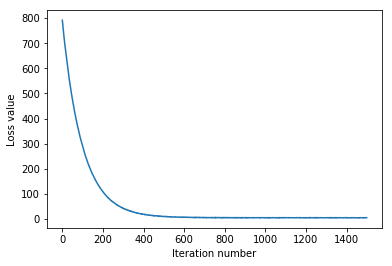

In [28]:
plt.plot(loss_hint)
plt.xlabel("Iteration number")
plt.ylabel("Loss value")
plt.show()

测试当前模型的准确率

In [30]:
y_train_pred = svm_model.predict(X_train)
print('training accuracy : %f' % (np.mean(y_train == y_train_pred),))

y_val_pred = svm_model.predict(X_val)
print('validation accuracy : %f' % (np.mean(y_val == y_val_pred),))

training accuracy : 0.369531
validation accuracy : 0.386000


## 选择最佳的超参数，搜索算法

In [39]:
learning_rates = [1.4e-7, 1.5e-7, 1.6e-7]
regularization_strengths = [(1+i*0.1)*1e4 for i in range(-3,3)] + [(2+0.1*i)*1e4 for i in range(-3,3)]

results = {}
best_val = -1
best_svm_model = None

for rs in regularization_strengths:
    for lr in learning_rates:
        svm_model = LinearSVM()
        loss_hint = svm_model.train(X=X_train, y=y_train, learning_rate=lr, reg=rs,num_iters=3000)
        y_train_pred = svm_model.predict(X_train)
        training_accuracy = np.mean(y_train == y_train_pred)
        y_val_pred = svm_model.predict(X_val)
        validation_accuracy = np.mean(y_val == y_val_pred)
        if validation_accuracy > best_val:
            best_val = validation_accuracy
            best_svm_model = svm_model
        results[(lr, rs)] = training_accuracy, validation_accuracy # {tuple : list}

for lr, reg in sorted(results):
    training_accuracy, validation_accuracy = results[(lr, reg)]
    print('when the learning rate is: %e, regularization strengths is : %e' % (lr, rs))
    print('the training accuracy is: %f, the validation accuracy is : %f' % (training_accuracy, validation_accuracy))
    
print('the best validation accuracy is: %f' % best_val)

when the learning rate is: 1.400000e-07, regularization strengths is : 2.200000e+04
the training accuracy is: 0.392449, the validation accuracy is : 0.390000
when the learning rate is: 1.400000e-07, regularization strengths is : 2.200000e+04
the training accuracy is: 0.388327, the validation accuracy is : 0.384000
when the learning rate is: 1.400000e-07, regularization strengths is : 2.200000e+04
the training accuracy is: 0.391939, the validation accuracy is : 0.393000
when the learning rate is: 1.400000e-07, regularization strengths is : 2.200000e+04
the training accuracy is: 0.394224, the validation accuracy is : 0.382000
when the learning rate is: 1.400000e-07, regularization strengths is : 2.200000e+04
the training accuracy is: 0.387612, the validation accuracy is : 0.399000
when the learning rate is: 1.400000e-07, regularization strengths is : 2.200000e+04
the training accuracy is: 0.395755, the validation accuracy is : 0.404000
when the learning rate is: 1.400000e-07, regularizat

In [40]:
y_test_pred = best_svm_model.predict(X_test)
test_accuracy = (np.mean(y_train == y_train_pred)) 
print('test accuracy : %f' % test_accuracy)

test accuracy : 0.376061


## 可视化权重

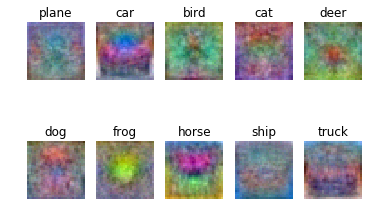

In [41]:
w = best_svm_model.W[:-1, :]
# W (D * C) 3072 * 10
w = w.reshape(32, 32, 3, 10)
w_min, w_max = np.min(w), np.max(w)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

for i in range(10):
    plt.subplot(2, 5, i + 1)
    w_img = 255 * (w[:, :, :, i].squeeze() - w_min)/ (w_max - w_min)
    plt.imshow(w_img.astype('uint8'))
    plt.title(classes[i])
    plt.axis('off')